### INTRODUCTION TO PYTHON - PART VI
### This tutorial was developed as a part of the CS Outreach Professional workshop series.If you have any comments on this file,please feel free to mail me at rxj133030@utdallas.edu

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

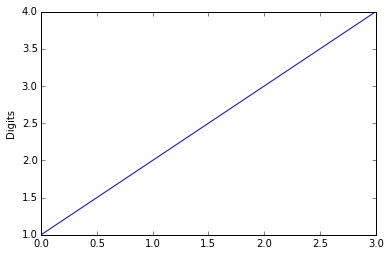

In [17]:
# Basic plot
plt.plot([1,2,3,4])
plt.ylabel('Digits')
plt.show()

In [ ]:
# Scatter Plots 

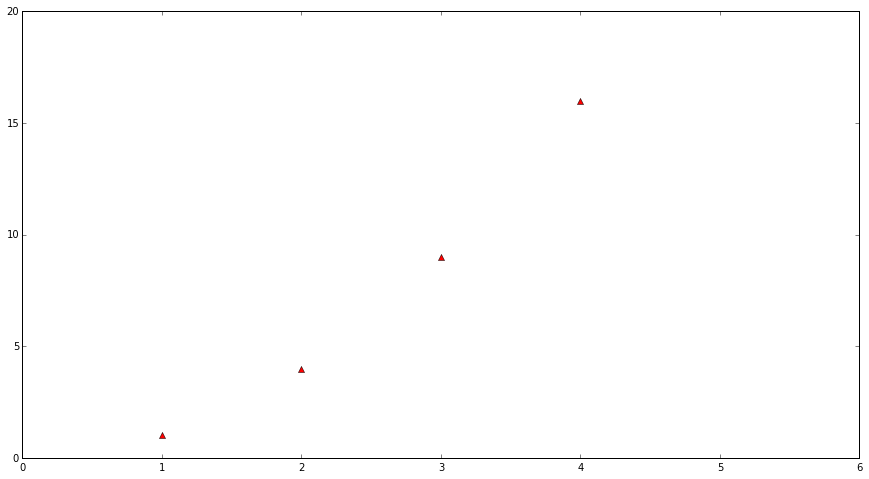

In [27]:
#setting  parameters
width = 15
height = 8
plt.figure(figsize=(width, height))
plt.plot([1,2,3,4], [1,4,9,16], 'r^')
plt.axis([0, 6, 0, 20])
plt.show()

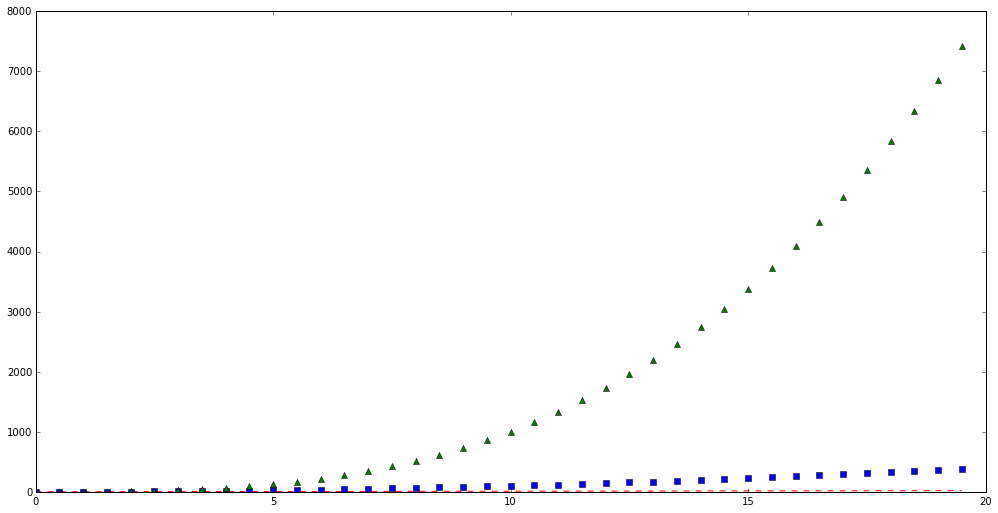

In [28]:
t = np.arange(0., 20., 0.5)

#setting  parameters
width = 20
height = 10
plt.figure(figsize=(width, height))

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

In [2]:
# Plotting a series
np.random.seed(1)
ts= pd.Series(np.random.randn(10), index=pd.date_range('1/1/2000', periods=10))

In [3]:
ts

2000-01-01    1.624345
2000-01-02   -0.611756
2000-01-03   -0.528172
2000-01-04   -1.072969
2000-01-05    0.865408
2000-01-06   -2.301539
2000-01-07    1.744812
2000-01-08   -0.761207
2000-01-09    0.319039
2000-01-10   -0.249370
Freq: D, dtype: float64

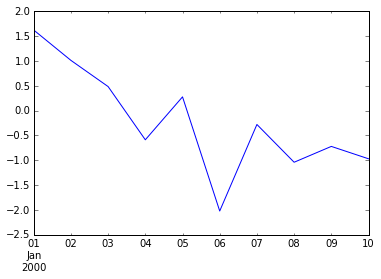

In [9]:
%matplotlib inline 
ts.plot()


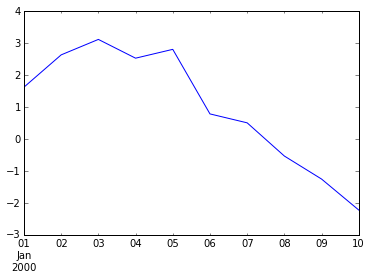

In [10]:
# Cumulative Sum
ts=ts.cumsum()
ts.plot()

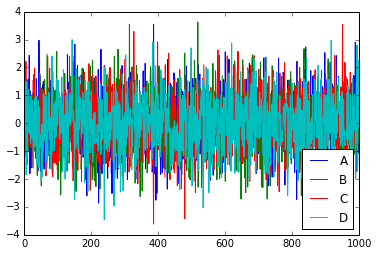

In [33]:
### Analyzing all the columns at the same time
df = pd.DataFrame(np.random.randn(1000, 4),columns=['A', 'B', 'C', 'D'])
df.plot()



In [14]:
plt.figure()

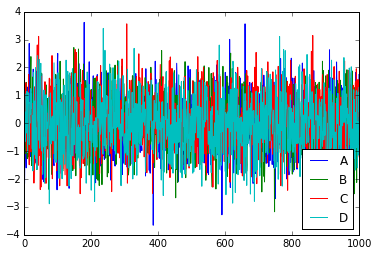

In [16]:
# for interactive maps ,not working needs a reset to the notebook
%matplotlib qt
df.plot()

In [ ]:
# Working on AIRBNB Kaggle DataScience Challenge data

In [34]:
plt.style.use('ggplot')

df_train = pd.read_csv('train_users_2.csv')

In [35]:

# Training data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 27.7+ MB


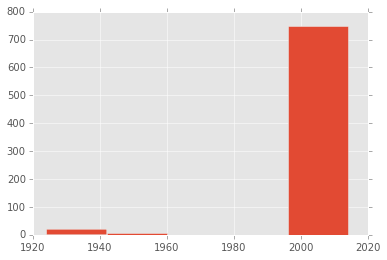

In [36]:
df_train[df_train.age > 1000].age.hist(bins=5)

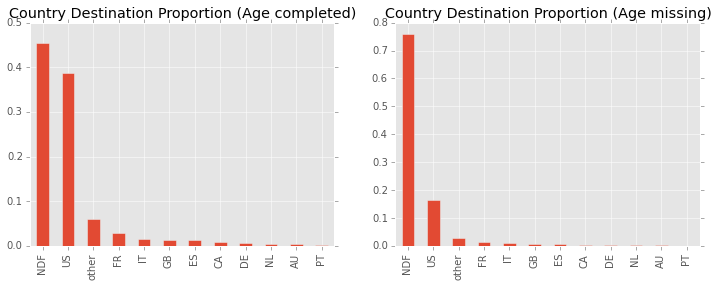

In [37]:
# Imputing the missing values
av = df_train.age.values
df_train['age'] = np.where(np.logical_and(av>1919, av<1995), 2015-av, av)
df_train['age'] = np.where(np.logical_or(av<14, av>100), np.nan, av)

# Summarizing the data
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
complete_age = df_train[df_train.age.notnull()].country_destination.value_counts()
missing_age = df_train[df_train.age.isnull()].country_destination.value_counts()
complete_age.div(complete_age.sum()).plot(kind='bar',title='Country Destination Proportion (Age completed)',ax=axes[0])
missing_age.div(missing_age.sum()).plot(kind='bar',title='Country Destination Proportion (Age missing)',ax=axes[1])